In [1]:
import numpy as np

In [18]:
# генерируем дискретную величину
np.random.randint(1, 5)

3

In [31]:
np.random.randint(1, 5, 100)

array([4, 4, 2, 2, 1, 4, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 1, 4, 3, 4, 1, 1,
       1, 4, 2, 4, 2, 4, 4, 3, 2, 3, 3, 3, 4, 1, 3, 1, 3, 3, 2, 2, 4, 1,
       1, 2, 4, 4, 3, 1, 2, 1, 3, 4, 3, 1, 1, 4, 3, 4, 2, 3, 1, 1, 1, 1,
       2, 3, 2, 3, 1, 2, 2, 2, 4, 1, 1, 2, 3, 2, 1, 3, 4, 3, 4, 1, 3, 1,
       3, 4, 3, 4, 3, 4, 1, 2, 4, 1, 3, 1])

In [41]:
# генерируем непрерывную величину
np.random.random(100)

array([0.24755603, 0.04752307, 0.6423648 , 0.35656148, 0.16569218,
       0.80053393, 0.20379926, 0.75258716, 0.51563161, 0.43849926,
       0.31818763, 0.78232853, 0.44991665, 0.92113155, 0.61461198,
       0.01388711, 0.3363264 , 0.42455878, 0.90745436, 0.08955338,
       0.44699175, 0.88179726, 0.40257195, 0.88399522, 0.62495413,
       0.18185089, 0.95449753, 0.06968088, 0.18136281, 0.29376083,
       0.63467195, 0.11927952, 0.89999191, 0.93719187, 0.75292657,
       0.79264369, 0.14768813, 0.38417785, 0.81878668, 0.82570886,
       0.22536812, 0.16244984, 0.70133481, 0.92602298, 0.18567239,
       0.09853852, 0.52546556, 0.35498966, 0.16150945, 0.10626141,
       0.99335502, 0.23181986, 0.16820358, 0.16189983, 0.63493793,
       0.05704702, 0.69448682, 0.50669929, 0.1657598 , 0.77583777,
       0.17150197, 0.73331511, 0.52997257, 0.56986575, 0.93975531,
       0.11101734, 0.36062371, 0.79373046, 0.72592014, 0.02527685,
       0.9588609 , 0.73248201, 0.85659894, 0.16369088, 0.65295

In [55]:
np.random.uniform(1, 5)

1.0133170796659998

In [160]:
np.random.seed(None)
np.random.uniform(1, 5, 10)

array([1.61036444, 3.16141328, 4.24601316, 2.60361657, 2.3396005 ,
       1.57562642, 4.09050392, 1.50037884, 2.75087929, 2.60492559])

**Задача 1.** Оценить вероятность того, что на игральной кости выпадет больше 4 очков. Сравнить с теоретической вероятностью.

In [91]:
import numpy as np
np.random.seed(None)
trials = 1000000    # Количество попыток
successes = 0    # Количество успехов

for i in range(trials):
    random_score = np.random.randint(1, 7)    # Случайное количество очков от 1 до 6
    if random_score > 4:
        successes += 1
        
p_monte_carlo = successes / trials    # Вероятность из моделирования
p = 2 / 6                             # Теоретическая вероятность

print(successes, trials, p_monte_carlo, p)

334167 1000000 0.334167 0.3333333333333333


**Задача 1А** (опциональная). Дан квадрат, в который вписан круг (касаясь сторон квадрата). В квадрат случайным образом попадают точки. Какова вероятность, что наугад взятая точка попадёт в круг?  
_Подсказка:_ Удобно взять квардат со стороной, равной 2, и отсчитывать координаты точек от его центра.

In [94]:
trials = 1000000
successes = 0

for i in range(trials):
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)
    
    if x**2 + y**2 < 1:
        successes += 1
        
res = successes / trials

In [95]:
res * 4

3.14032

**Задача 2.** Смоделировать стрельбу по мишени.

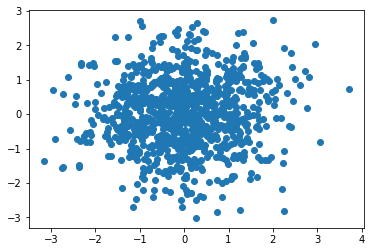

In [161]:
import matplotlib.pyplot as plt

shots = 1000    # Количество выстрелов
std_dev = 1 # Стандартное отклонение (на сколько мы в среднем будем мазать)

x = np.random.normal(0, std_dev, shots) # 0 - и среднее, и мода, и медиана
y = np.random.normal(0, std_dev, shots)


plt.scatter(x, y)
# почему разброс от -3 до 3?

**Задача 3.** Графически определить распределение измеренных значений физической величины, когда измерительный прибор имеет случайную погрешность.

In [162]:
import pandas as pd

data = pd.read_csv("data.log", sep=" ")["az"]
data.describe()

count    1040.000000
mean       -9.797112
std         0.087958
min       -10.030373
25%        -9.866481
50%        -9.800747
75%        -9.727398
max        -9.570811
Name: az, dtype: float64

In [163]:
uni = np.random.uniform(min(data), max(data), 10000)
normal = np.random.normal(np.mean(data), np.std(data, ddof=1), 10000)

<AxesSubplot:>

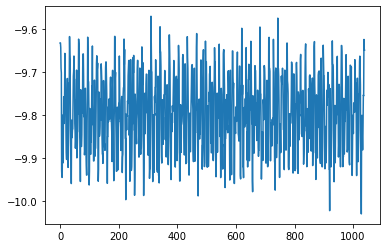

In [164]:
data.plot()

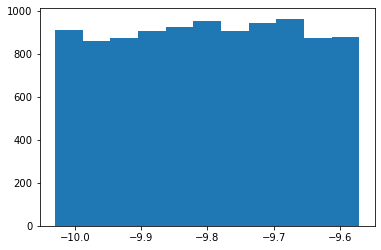

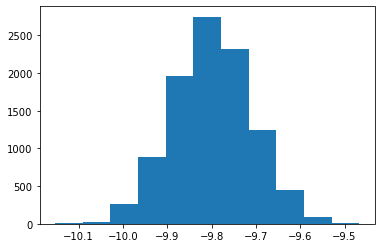

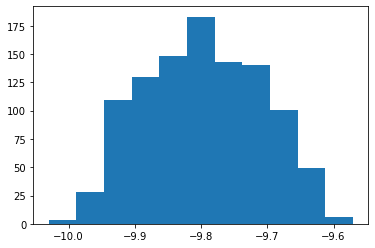

In [165]:
plt.hist(uni, bins=11)
plt.show()
plt.hist(normal, bins=11)
plt.show()
plt.hist(data, bins=11)
plt.show()

**Задача 4.** Рассчитать вероятность того, что пациент заражён COVID-19, если известно, что тест дал положительный результат. Сравнить с результатом моделирования.

In [170]:
prev = 0.10    # Распространённость болезни
sens = 0.97    # Чувствительность теста
spec = 0.90    # Специфичность теста

p = (sens * prev) / (sens * prev + (1 - spec) * (1 - prev))   # Теоретическая вероятность 
print(p)

0.5187165775401069


In [171]:
population = 100000    # Количество испытуемых

true_pos = 0    # Количество больных с положительным тестом
false_pos = 0   # Количество здоровых с положительным тестом

for i in range(population):
    # Наугад решаем, заражён ли человек
    # для этого генерируем случайную величину от 0 до 1     
    infected = np.random.uniform() < prev
    
    # Наугад решаем, дал ли тест положительный результат 
    positive = np.random.uniform() < sens if infected else np.random.uniform() < 1 - spec
    
    if positive:
        if infected:
            true_pos += 1
        else:
            false_pos += 1
            
p_monte_carlo = true_pos / (true_pos + false_pos)    # Вероятность из моделирования
print(p_monte_carlo)

0.5169265271251602
